# Isospectral Matrix Reduction

We first perform Isospectral Reduction along row 1 for our matrix $M$

$$
M =
\begin{bmatrix}
1 & 0 & 1 & -1\\
2 & 1 & -1 & 1\\
1 & 0 & 0 & 2\\
1 & 1 & 1 & 1\\
\end{bmatrix}
$$

Since our matrix is a $4\times4$ square matrix, our $S \subset \{1,2,3,4\}$, and reducing along row 1 would mean that $S$ contains everything but 1, hence $S = \{2,3,4\}$.
Then, denoting $\overline{S}$ as the set complement of $S$, we have $\overline{S} = \{1\}$.

We then obtain the following four submatrices, if $M_{RC}$ is the submatrix of $M$ with rows indexed by $R$ and columns indexed by $C$.

$$
M_{SS} = 
\begin{bmatrix}
1 & -1 & 1\\
0 & 0 & 2\\
1 & 1 & 1\\
\end{bmatrix}
\quad
M_{\overline{S}S} = 
\begin{bmatrix}
0 & 1 & -1
\end{bmatrix}
\quad
M_{S\overline{S}} = 
\begin{bmatrix}
2\\
1\\
1\\
\end{bmatrix}
\quad
M_{\overline{SS}} = 
\begin{bmatrix}
1
\end{bmatrix}
$$

The formula for Isospectral row reduction is:

$$
\mathcal{R}_{S}(M) = M_{SS} - M_{S\overline{S}}(M_{\overline{SS}} - \lambda I)^{-1}M_{\overline{S}S}
$$

Using this formula, we obain

$$
\mathcal{R}_{S}(M) =
\begin{bmatrix}
1 & -1 - \frac{2}{1 - \lambda} & 1 + \frac{2}{1 - \lambda}\\
0 & \frac{-1}{1 - \lambda} & 2 + \frac{1}{1 - \lambda}\\
1 & 1 - \frac{1}{1 - \lambda} & 1 + \frac{1}{1 - \lambda}\\
\end{bmatrix}
$$

We can verify that the spectrum of our original matrix $M$ corresponds with that of our reduced matrix $\mathcal{R}_{S}(M)$ below.

In [1]:
import numpy as np
import scipy.linalg as la
import sympy as sy
sy.init_printing()

In [2]:
M = np.array([[1,0,1,-1],[2,1,-1,1],[1,0,0,2],[1,1,1,1]])
eigs = la.eigvals(M)
eigs

array([-1.65896708+0.j        ,  2.        +0.j        ,
        1.32948354+0.80225456j,  1.32948354-0.80225456j])

In [3]:
x = sy.symbols('x')
S = sy.Matrix(M)
# Isospectral reduction formula
R = S[1:,1:] - ((1/(1-x))*S[1:,0]@S[0,1:])
R

⎡          2           2   ⎤
⎢1  -1 - ──────  1 + ──────⎥
⎢        -x + 1      -x + 1⎥
⎢                          ⎥
⎢      -1              1   ⎥
⎢0    ──────     2 + ──────⎥
⎢     -x + 1         -x + 1⎥
⎢                          ⎥
⎢         1            1   ⎥
⎢1  1 - ──────   1 + ──────⎥
⎣       -x + 1       -x + 1⎦

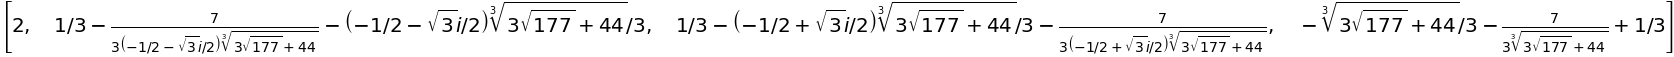

In [4]:
char_poly = (R - x*sy.eye(3)).det()
sy.solve(char_poly, x)

# Gershgorin's Theorem

Gershgorin's Theorem tells us that if we have a square matrix $M$, its eigenvalues are contained in the region described by 

$$
\Gamma(M) = \bigcup_{i=1}^n \Big\{\lambda \in \mathbb{C} : |\lambda - M_{ii}| \leq \sum_{j=1, j\neq i}^n |M_{ij}|\Big\}
$$

Solving these regions for $M$, we obtain

$$
\Gamma(M) = \{|\lambda - 1| \leq 2\} \cup \{|\lambda - 1| \leq 4\} \cup \{|\lambda| \leq 3\} \cup \{|\lambda - 1| \leq 3\}
$$

We plot this region using a simple scatter plot. 

In [5]:
import matplotlib.pyplot as plt
from pylab import *

In [6]:
domain = np.linspace(-5,5,200)
domain = np.array([r + 1j*np.linspace(-5,5,200) for r in domain]).flatten()

r1 = []
r2 = []
r3 = []
r4 = []
area = 0
for c in domain:
    if np.abs(c-1) <= 2:
        r1.append(c)
    if np.abs(c-1) <= 4:
        r2.append(c)
        area += 1
    if np.abs(c) <= 3:
        r3.append(c)
    if np.abs(c - 1) <= 3:
        r4.append(c)
area *= (10/199)**2
str(area)

'50.276508168985636'

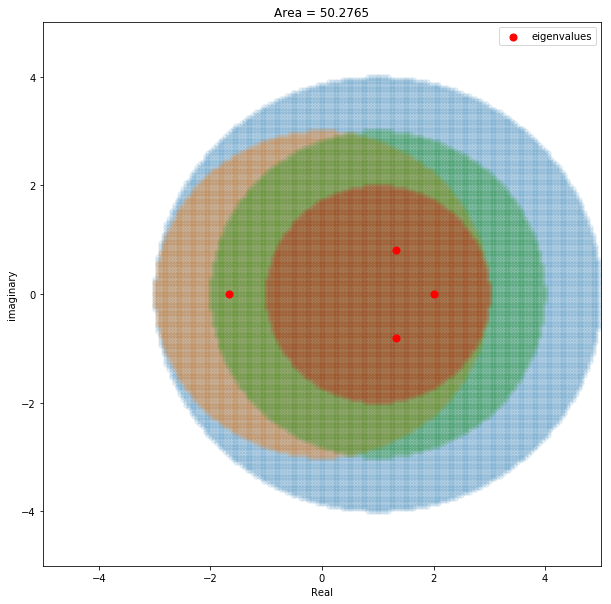

In [7]:
plt.figure(figsize=(10,10))
plt.scatter(np.real(r2), np.imag(r2), alpha=0.1, s=30)
plt.scatter(np.real(r3), np.imag(r3), alpha=0.1, s=30)
plt.scatter(np.real(r4), np.imag(r4), alpha=0.1, s=30)
plt.scatter(np.real(r1), np.imag(r1), alpha=0.1, s=30)
plt.scatter(np.real(eigs), np.imag(eigs), s=50, c='r', label='eigenvalues')

plt.legend()
plt.ylim((-5,5))
plt.xlim((-5,5))
plt.xlabel("Real")
plt.ylabel("imaginary")
plt.title("Area = " + "{0:.4f}".format(area))
plt.show()

We now solve the Gershgorin regions for R and we obtain

$$
\Gamma({\mathcal{R}_{S}(M)}) = \Big\{|\lambda - 1| \leq \Big|{-1 - \frac{2}{1 - \lambda}}\Big| + \Big|1 + \frac{2}{1 - \lambda}\Big|\Big\} \bigcup \Big\{\Big|\lambda + \frac{1}{1 - \lambda}\Big| \leq \Big|2 + \frac{1}{1 - \lambda}\Big| \Big\} \bigcup \Big\{\Big|\lambda + 1 + \frac{1}{1 - \lambda}\Big| \leq 1 + \Big|1 - \frac{1}{1 - \lambda}\Big|\Big\}
$$

In [8]:
g1 = []
g2 = []
g3 = []
for c in domain:
    if np.abs(c-1) <= np.abs(-1-2/(1-c)) + np.abs(1+2/(1-c)):
        g1.append(c)
    if np.abs(c + 1/(1-c)) <= np.abs(2 + 1/(1-c)):
        g2.append(c)
    if np.abs(c - (1 + 1/(1-c))) <= 1 + np.abs(1-1/(1-c)):
        g3.append(c)

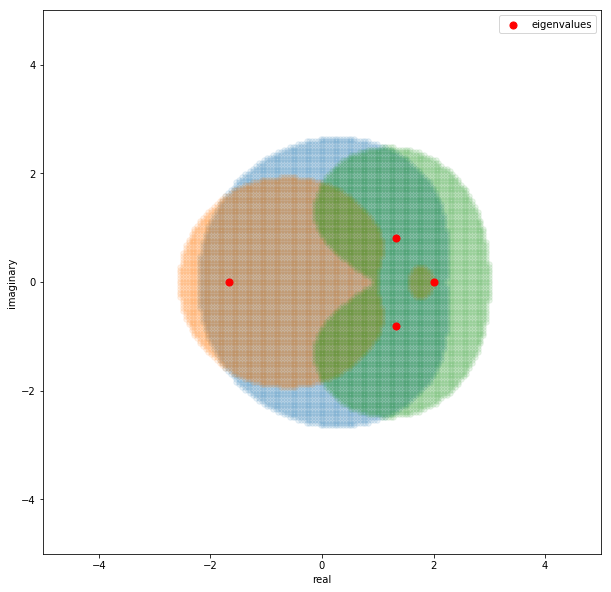

In [9]:
plt.figure(figsize=(10,10))
plt.scatter(np.real(g1), np.imag(g1), alpha=0.1, s=30)
plt.scatter(np.real(g2), np.imag(g2), alpha=0.1, s=30)
plt.scatter(np.real(g3), np.imag(g3), alpha=0.1, s=30)
plt.scatter(np.real(eigs), np.imag(eigs), s=50, c='r', label='eigenvalues')
plt.legend()
plt.ylim((-5,5))
plt.xlim((-5,5))
plt.xlabel("real")
plt.ylabel("imaginary")
plt.show()

Following the same procedure, we now reduce the matrix $M$ along the rows 1 and 3. ($S = \{2, 4\}$)

In [10]:
#Indexing for the correct matrices
s_1 = sy.Matrix(M[[1,3], [[1,1],[3,3]]].T) #M_S,S
s_2 = sy.Matrix(M[[0,2], [[1,1],[3,3]]].T) #M_Sbar,S
s_3 = sy.Matrix(M[[1,3], [[0,0],[2,2]]].T) #M_S,Sbar
s_4 = sy.Matrix(M[[0,2], [[0,0],[2,2]]].T) #M_Sbar,Sbar

We check to see that all our submatrices are correct

In [11]:
S

⎡1  0  1   -1⎤
⎢            ⎥
⎢2  1  -1  1 ⎥
⎢            ⎥
⎢1  0  0   2 ⎥
⎢            ⎥
⎣1  1  1   1 ⎦

In [12]:
s_1

⎡1  1⎤
⎢    ⎥
⎣1  1⎦

In [13]:
s_2

⎡0  -1⎤
⎢     ⎥
⎣0  2 ⎦

In [14]:
s_3

⎡2  -1⎤
⎢     ⎥
⎣1  1 ⎦

In [15]:
s_4

⎡1  1⎤
⎢    ⎥
⎣1  0⎦

Compute the isospectral reduction

In [16]:
R2 = s_1 - s_3@(s_4 - x*sy.eye(2)).inv()@s_2
R2

⎡        2⋅x           2⋅(x - 1)          4⋅(x⋅(-x + 1) + x⋅(x - 1) + 1)      
⎢1  ────────────── + ────────────── + 1 - ────────────────────────────── - ───
⎢   x⋅(-x + 1) + 1   x⋅(-x + 1) + 1               x⋅(-x + 1) + 1           x⋅(
⎢                                                                             
⎢         x            2⋅(x - 1)          2⋅(x⋅(-x + 1) + x⋅(x - 1) + 1)      
⎢1  ────────────── - ────────────── + 1 - ────────────────────────────── + ───
⎣   x⋅(-x + 1) + 1   x⋅(-x + 1) + 1               x⋅(-x + 1) + 1           x⋅(

   1       ⎤
───────────⎥
-x + 1) + 1⎥
           ⎥
   1       ⎥
───────────⎥
-x + 1) + 1⎦

Check to see that its spectrum corresponds to the original

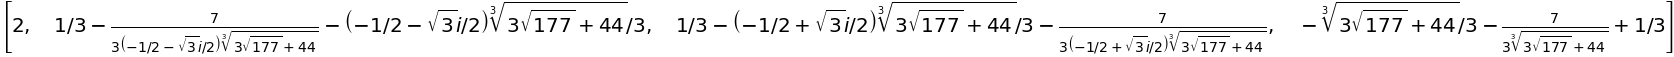

In [17]:
char_poly2 = (R2 - x*sy.eye(2)).det()
sy.solve(char_poly2, x)

We now compute the regions. Since $\mathcal{R}_S(M)$ is now only a $2\times2$ matrix, the regions are defined as

$$
\Gamma(\mathcal{R}_S(M)) = \{|\lambda - r_{11}| \leq |r_{12}|\} \cup \{|\lambda - r_{22}| \leq |r_{12}|\}
$$

Since $r_{11} = r_{21} = 1$, we obtain

$$
\Gamma(\mathcal{R}_S(M)) = \{|\lambda - 1| \leq |r_{12}|\} \cup \{|\lambda - r_{22}| \leq 1\}
$$

We define $|r_{12}|$ and $|\lambda - r_{22}|$ as callable functions.

In [18]:
f1 = sy.lambdify(x, abs(R2[1]))
f2 = sy.lambdify(x, abs(x-R2[3]))

In [19]:
gg1 = []
gg2 = []
for c in domain:
    if np.abs(c - 1) <= f1(c):
        gg1.append(c)
    if f2(c) <= 1:
        gg2.append(c)

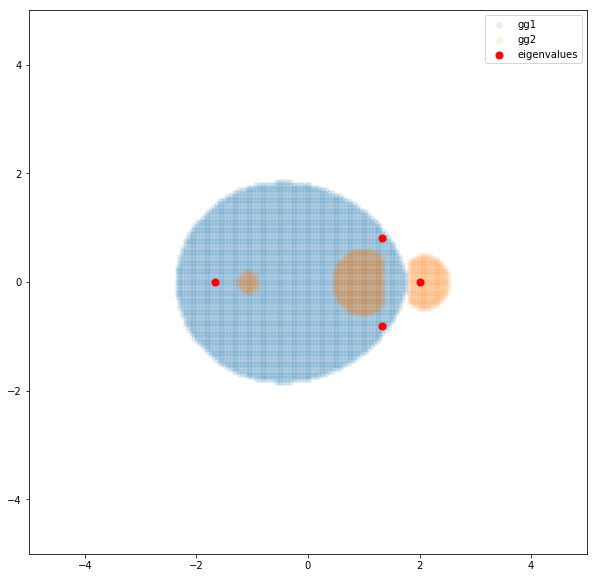

In [20]:
plt.figure(figsize=(10,10))
plt.scatter(np.real(gg1), np.imag(gg1), alpha=0.1, s=30, label='gg1')
plt.scatter(np.real(gg2), np.imag(gg2), alpha=0.1, s=30, label='gg2')
plt.scatter(np.real(eigs), np.imag(eigs), s=50, c='r', label='eigenvalues')
plt.legend()
plt.ylim((-5,5))
plt.xlim((-5,5))
plt.show()

Following the algorithms like the ones above, we now make python functions that allow us to take in any $n \times n$ matrix and set $S \subset \{0, 1, ... , n-1\}$ as inputs and produces the isospectral reduction and the gershgorin regions as outputs. 

In [21]:
'''
Reduce the Matrix M by following the isospectral reduction algorithm with S given.
Parameters:
    M (Sympy n by n Matrix): matrix to be reduced.
    S (set): indexes of rows and columns to be reduced.
    x (Sympy symbol): variable used in M.
Returns:
    R (Sympy len(S) by len(S) Matrix): isospectrally reduced matrix.
'''
def isospectral_reduction(M, S, x):
    n = len(np.array(M))
    S = sorted(list(S))
    S_bar = [i for i in range(n) if S.count(i) == 0]
    m = len(S)
    s_1 = sy.Matrix(np.array(M)[S, [list(i*np.ones(m).astype(int)) for i in S]].T) #M_S,S
    s_2 = sy.Matrix(np.array(M)[S_bar, [list(np.ones(n-m).astype(int)*i) for i in S]].T) #M_Sbar,S
    s_3 = sy.Matrix(np.array(M)[S, [list(np.ones(m).astype(int)*i) for i in S_bar]].T) #M_S,Sbar
    s_4 = sy.Matrix(np.array(M)[S_bar, [list(np.ones(n-m).astype(int)*i) for i in S_bar]].T) #M_Sbar,Sbar
    R2 = s_1 - s_3@(s_4 - x*sy.eye(n-m)).inv()@s_2
    return R2

In [22]:
'''
Computes the Gershgorin regions of a matrix for each row as tuples of callable functions
Parameters:
    M (Sympy n by n Matrix): matrix to be reduced.
    x (Sympy symbol): variable used in M.
Returns:
    f (list of pairs of callable functions): list of pairs of callable functions, each pair defining a Gershgorin region.
'''
def gershgorin_regions(M, x):
    n = len(np.array(M))
    f = []
    for i in range(n):
        f1 = sy.lambdify(x, abs(x - M.row(i)[i]))
        f2 = sy.lambdify(x, sum([abs(R.row(i)[j]) for j in range(n) if i != j]))
        f.append((f1,f2))
    return f

In [23]:
'''
Plots the region along the domain on a complex plane. Also plots the eigenvalues.
Parameters:
    Domain (ndarray): square complexe valued domain
    regions (list of pairs of callable functions): list of pairs of callable functions, each pair defining a Gershgorin region.
    eigs (ndarray): eigenvalues of the original matrix the regions are derived from.
    S (set): indexes of rows and columns to be reduced.
'''
def plot_regions(domain, regions, eigs, S):
    g_range = [[] for i in range(len(regions))]
    area = 0
    for c in domain:
        skip = False
        for r,f in zip(g_range,regions):
            if f[0](c) <= f[1](c):
                r.append(c)
                if not skip:
                    area += 1
                    skip = True
    area *= (10/199)**2
    
    
    plt.figure(figsize=(10,10))
    for r in g_range:
        plt.scatter(np.real(r), np.imag(r), alpha = 0.1, s = 30)
    plt.scatter(np.real(eigs), np.imag(eigs), s=50, c='r', label='eigenvalues')
    plt.title("S = " + str(S) + ", Area = " + "{0:.4f}".format(area))
    plt.xlabel("real")
    plt.ylabel("imaginary")
    plt.legend()
    plt.ylim((-5,5))
    plt.xlim((-5,5))
    plt.show()

We now compute the powerset of the set $\{0, 1, 2, 3\}$, excluding the empty set, the original set, and the set of single element, since a 1 element matrix does not define any Gershgorin region. We plot all Gershgorin regions of the same matrix $M$ as defined above, reduced along all of the possible rows.

In [24]:
def powerset(s):
    p = []
    s = list(s)
    x = len(s)
    for i in range(1 << x):
        p.append(set([s[j] for j in range(x) if (i & (1 << j))]))
    return p

In [25]:
s = {0,1,2,3}
p = powerset(s)
temp = p.copy()
for pk in temp:
    if len(pk) == 0 or len(pk) == 1 or len(pk) == len(s):
        p.remove(pk)
p = p[::-1]

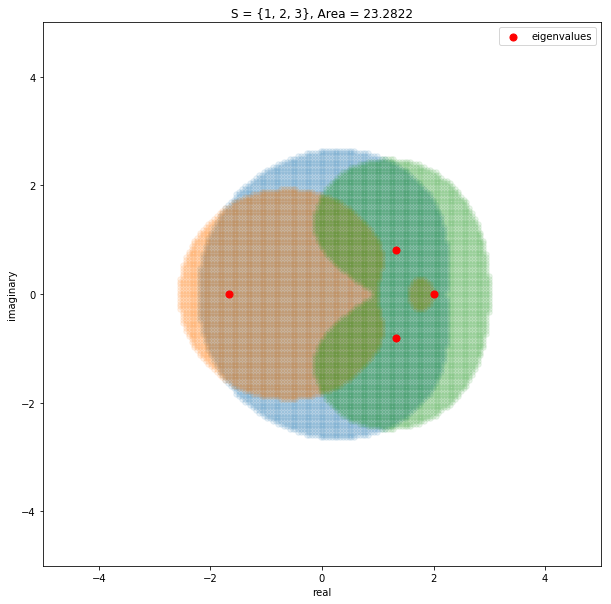

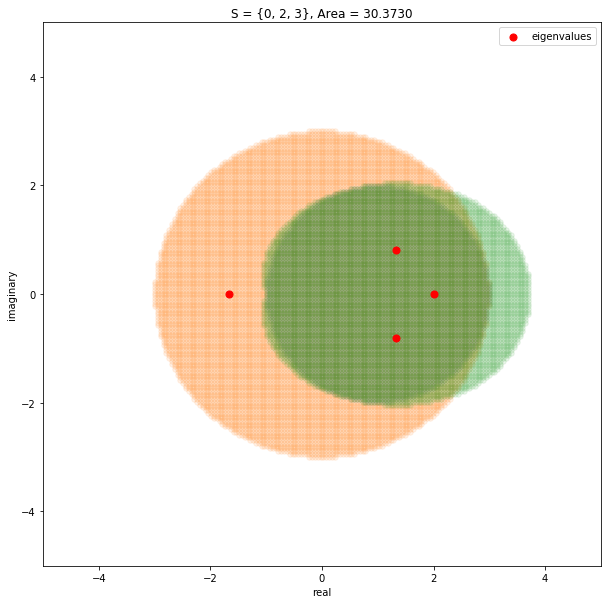

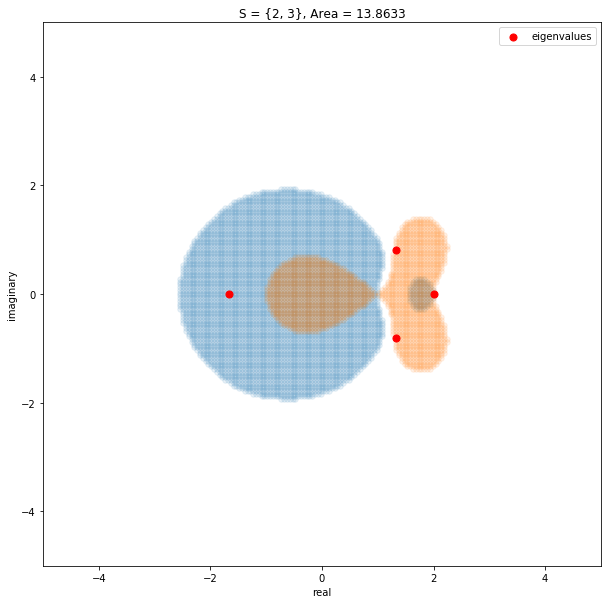

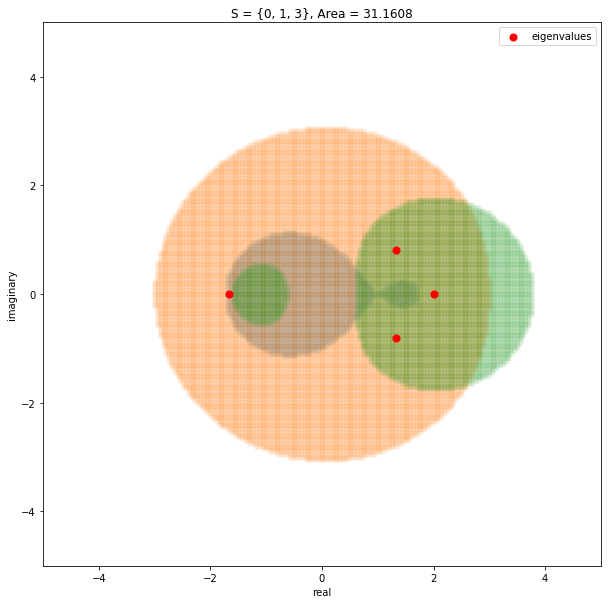

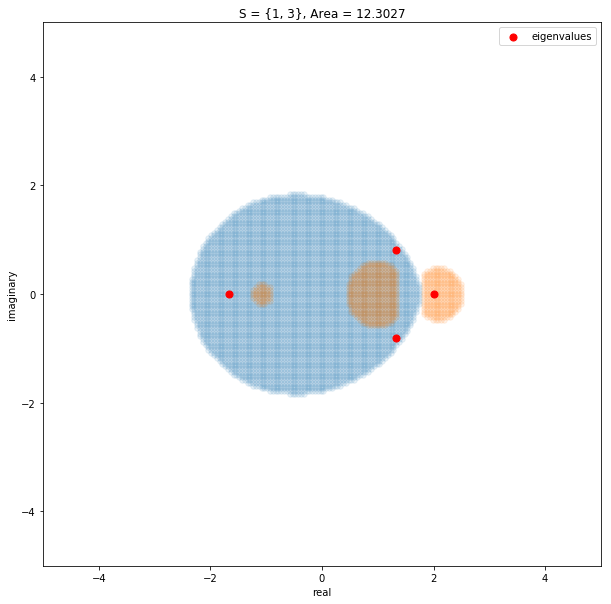

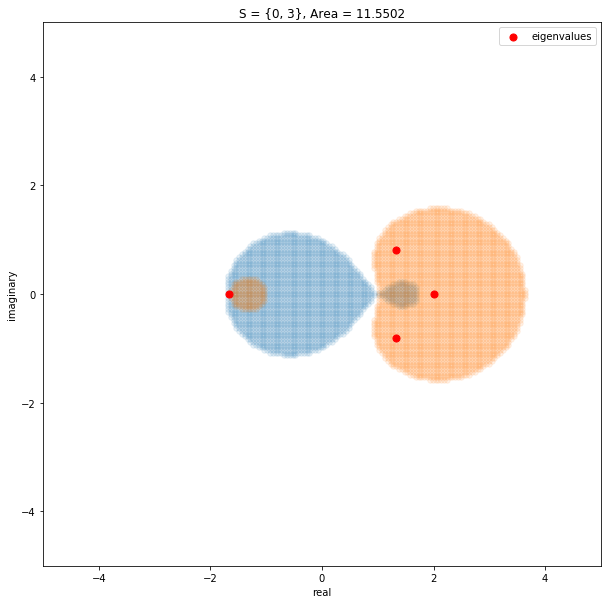

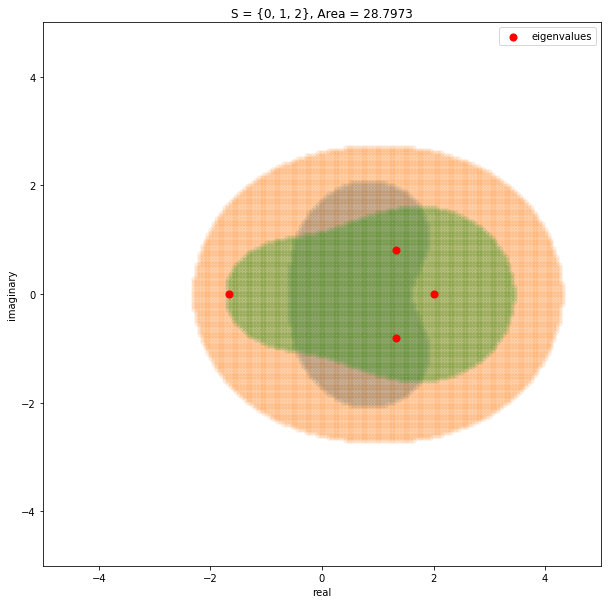

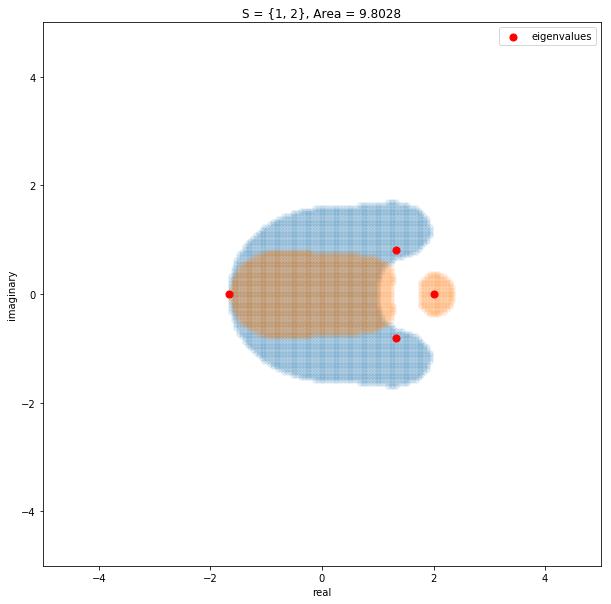

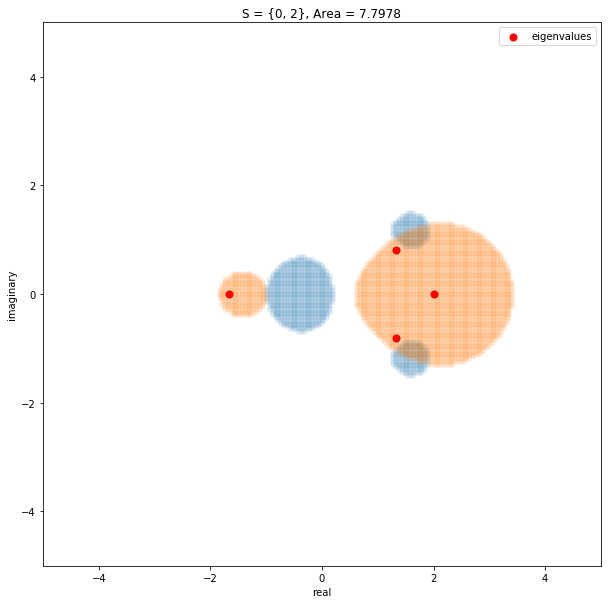

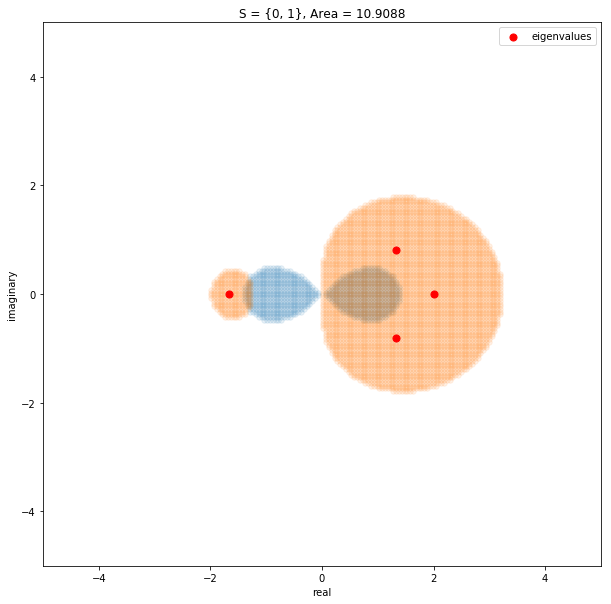

In [26]:
for s_ in p:
    R = isospectral_reduction(S, s_, x)
    f = gershgorin_regions(R, x)
    plot_regions(domain, f, eigs, s_)

We now compute all the Gershgorin regions of a new matrix, defined as below:

$$
M_2 =
\begin{bmatrix}
i & 0 & 1 & i-1\\
1 & 1 & -1 & 1\\
i & i+1 & 0 & 1\\
-1 & 1 & 1 & -1\\
\end{bmatrix}
$$


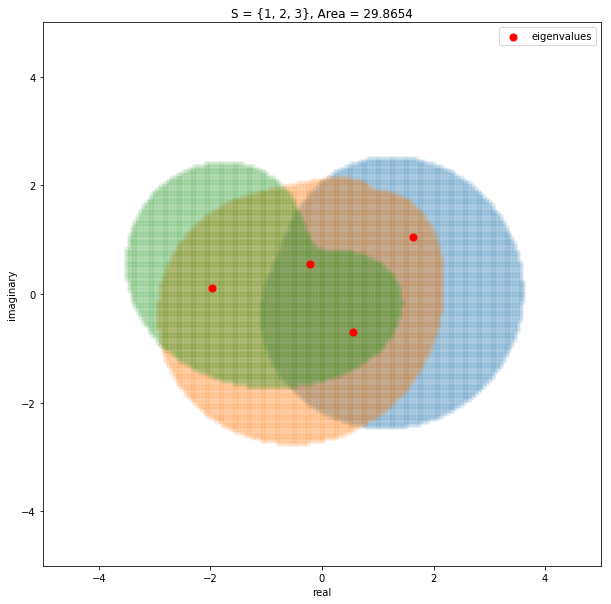

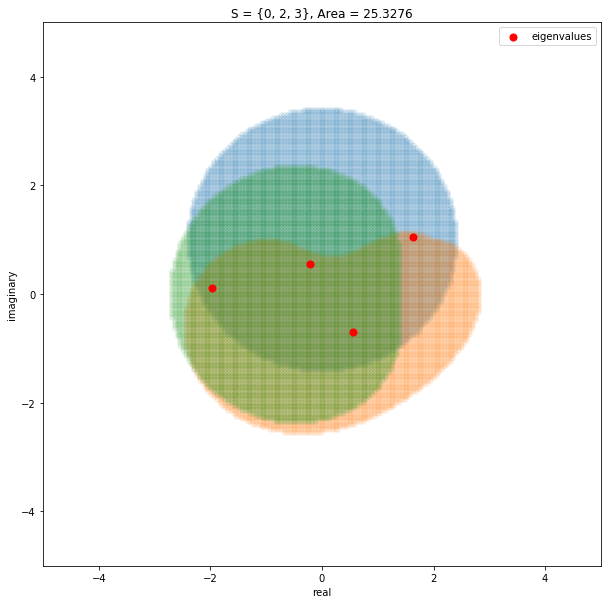

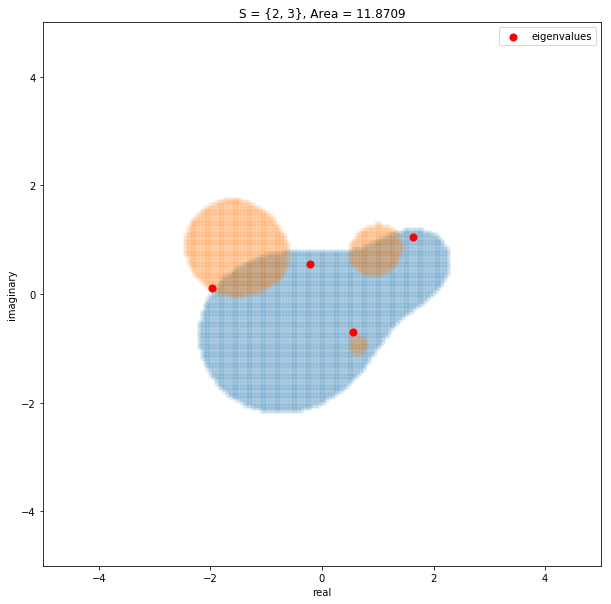

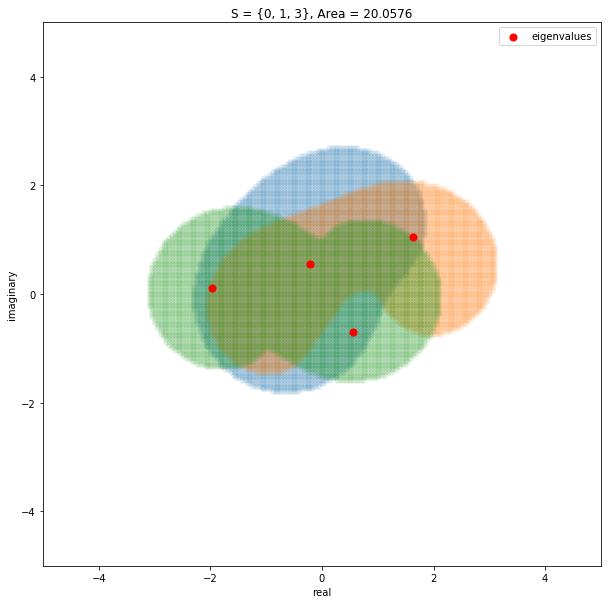

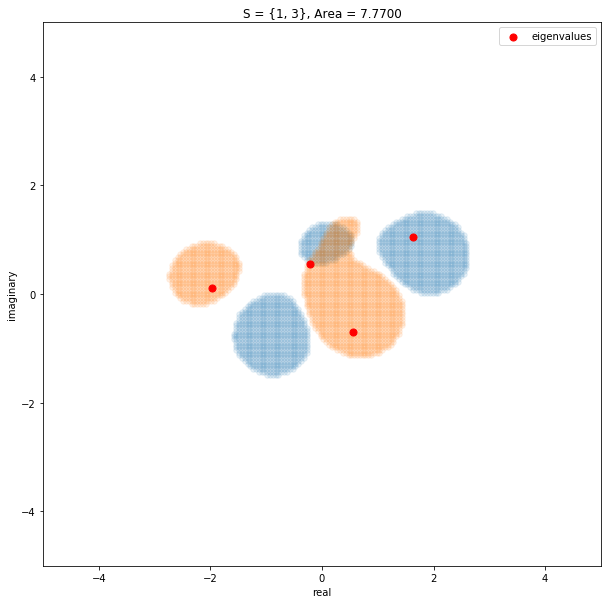

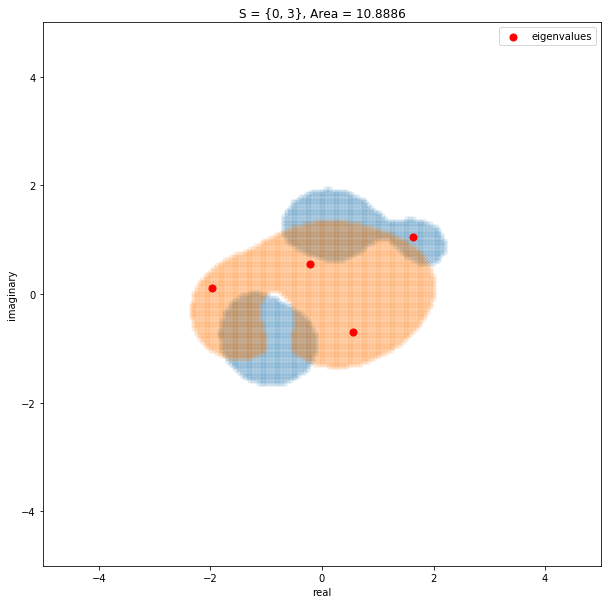

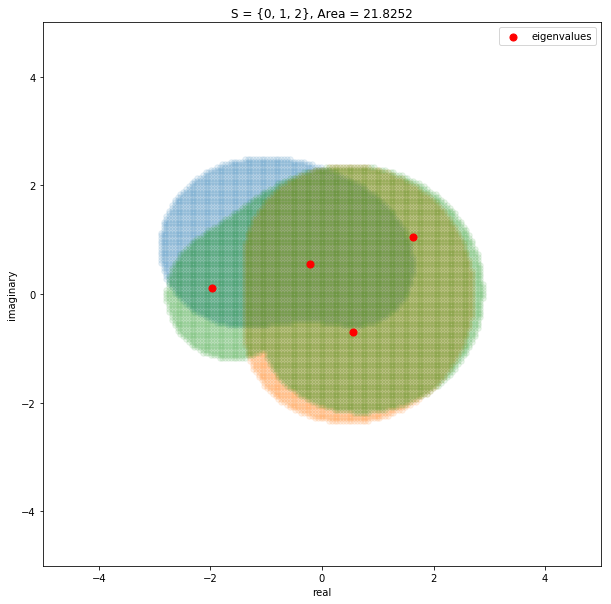

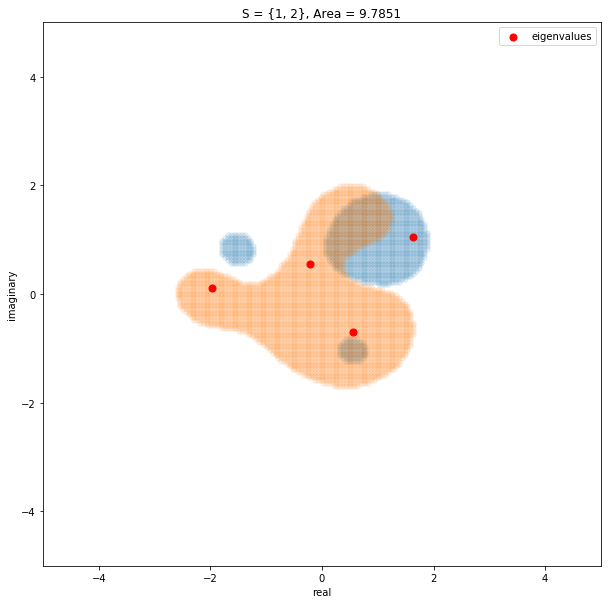

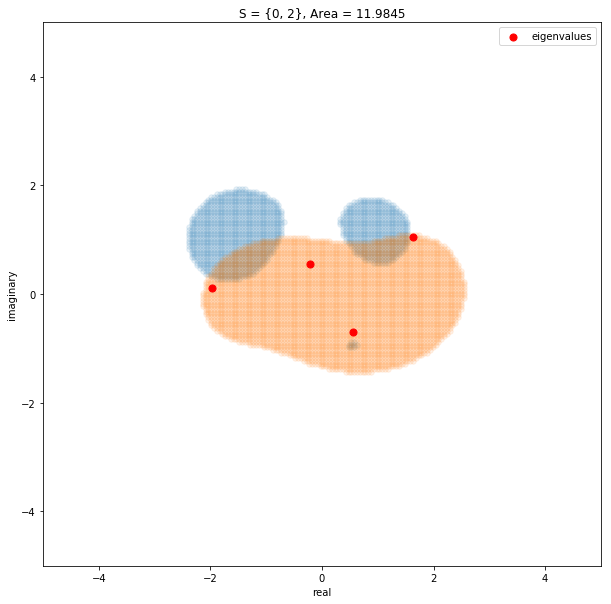

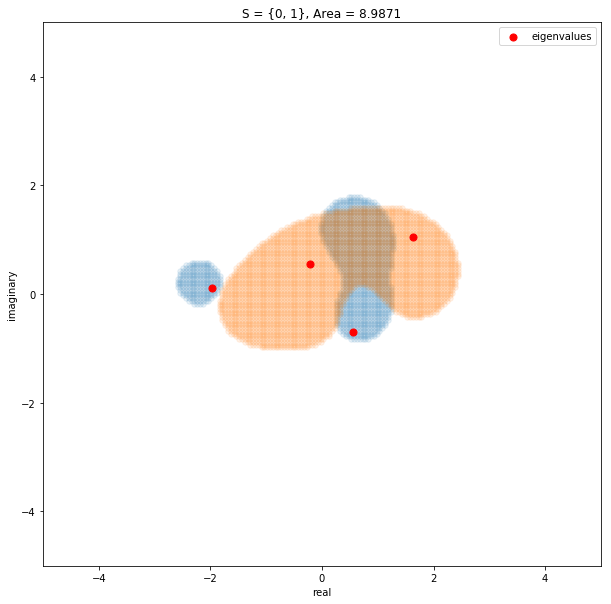

In [27]:
M2 = np.array([[1j, 0, 1, 1j-1], [1, 1, 1, -1], [1j, 1j+1, 0, 1], [-1, 1, 1, -1]])
S2 = sy.Matrix(M2)
eigs2 = la.eigvals(M2)
for s_ in p:
    R = isospectral_reduction(S2, s_, x)
    f = gershgorin_regions(R, x)
    plot_regions(domain, f, eigs2, s_)

In [29]:
x = sy.symbols('x')
M = np.array([[1,0,1,-1],[2,1,-1,1],[1,0,0,2],[1,1,1,1]])
isospectral_reduction(M, {0,1,2}, x)

⎡      1         1             1    ⎤
⎢1 + ──────    ──────    1 + ────── ⎥
⎢    -x + 1    -x + 1        -x + 1 ⎥
⎢                                   ⎥
⎢      1           1            1   ⎥
⎢2 - ──────  1 - ──────  -1 - ──────⎥
⎢    -x + 1      -x + 1       -x + 1⎥
⎢                                   ⎥
⎢      2        -2          -2      ⎥
⎢1 - ──────    ──────      ──────   ⎥
⎣    -x + 1    -x + 1      -x + 1   ⎦

In [31]:
M1 = np.zeros((8,8))
M1[0][:4] = M[0]
M1[1][:4] = M[1]
M1[2][:4] = M[2]
M1[3][:4] = M[3]
M1
isospectral_reduction(M1, {0,1,2}, x)

⎡        1.0          1.0                1.0    ⎤
⎢1.0 + ────────     ────────     1.0 + ──────── ⎥
⎢      -x + 1.0     -x + 1.0           -x + 1.0 ⎥
⎢                                               ⎥
⎢        1.0             1.0              1.0   ⎥
⎢2.0 - ────────  1.0 - ────────  -1.0 - ────────⎥
⎢      -x + 1.0        -x + 1.0         -x + 1.0⎥
⎢                                               ⎥
⎢        2.0         -2.0            -2.0       ⎥
⎢1.0 - ────────     ────────        ────────    ⎥
⎣      -x + 1.0     -x + 1.0        -x + 1.0    ⎦

In [33]:
M
np.pad(M, ((0,4),(0,4)), 'constant', constant_values=0)

array([[ 1,  0,  1, -1,  0,  0,  0,  0],
       [ 2,  1, -1,  1,  0,  0,  0,  0],
       [ 1,  0,  0,  2,  0,  0,  0,  0],
       [ 1,  1,  1,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0]])